In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('datafinal2.csv')
data.head()

,Unnamed: 0,country_code,country_name,year,Median age (years),"Net migration rate (per 1,000 people)",Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)",...,"Suicide rate, female (per 100,000 people)",Ratio of education and health expenditure to military expenditure,Current health expenditure (% of GDP),"Age-standarized mortality rate attributed to noncommunicable diseases, female","Age-standarized mortality rate attributed to noncommunicable diseases, male","Carbon dioxide emissions, per capita (tonnes)",Carbon dioxide emissions (kg per 2010 US$ of GDP),"Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Fossil fuel energy consumption (% of total energy consumption)
0,0,AFG,Afghanistan,1990,15.8,-25.1,8.2,2.3,13.6,0.4,...,5.748915,32.503931,6.142729,533.469231,694.073767,5.044112,0.268299,1340.0,15.9,64.36662
1,1,AFG,Afghanistan,1995,16.0,40.3,9.8,3.5,15.7,0.6,...,5.748915,32.503931,6.142729,533.469231,694.073767,5.044112,0.268299,1270.0,35.1,64.36662
2,2,AFG,Afghanistan,2000,15.5,-8.9,11.1,4.5,17.0,0.8,...,1.700000,32.503931,6.142729,857.800000,997.800000,5.044112,0.268299,1100.0,54.2,64.36662
3,3,AFG,Afghanistan,2005,16.0,6.4,14.5,6.3,22.3,1.0,...,5.748915,32.503931,9.900000,533.469231,694.073767,5.044112,0.268299,821.0,40.9,64.36662
4,4,AFG,Afghanistan,2010,15.9,-7.6,18.2,5.9,29.8,1.2,...,2.100000,6.200000,8.600000,826.100000,946.000000,5.044112,0.268299,584.0,14.8,64.36662


In [3]:
from sklearn.cluster import KMeans
dataset = data.iloc[:, 3:].values
data_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
data_norm

array([[0.0147216 , 0.00123824, 0.0009589 , ..., 0.01028224, 0.00123892,
        0.00156994],
       [0.01475575, 0.00123961, 0.00140557, ..., 0.00980416, 0.00137005,
        0.00156994],
       [0.0147899 , 0.00123619, 0.00106954, ..., 0.00864309, 0.0015005 ,
        0.00156994],
       ...,
       [0.01482405, 0.00125531, 0.00105042, ..., 0.00542626, 0.00167808,
        0.00133727],
       [0.0148582 , 0.00125736, 0.00107364, ..., 0.00417641, 0.00169652,
        0.00130039],
       [0.01489235, 0.001256  , 0.00106613, ..., 0.00415592, 0.00168901,
        0.00156994]])

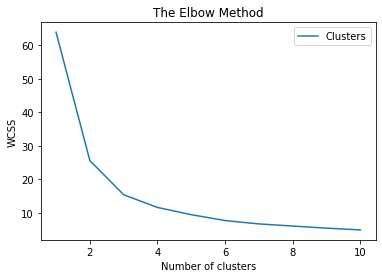

In [4]:
wcss= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, label='Clusters')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [5]:
kmeansM = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_M = kmeansM.fit_predict(data_norm)

In [6]:
centroids_V = kmeansM.cluster_centers_
centroids_V[0]

array([0.01480351, 0.00128946, 0.00111363, 0.00142689, 0.00140648,
       0.00145262, 0.00117054, 0.00117762, 0.00123076, 0.00168544,
       0.00147316, 0.00140316, 0.00144801, 0.00150892, 0.00147198,
       0.0016409 , 0.00113751, 0.00116415, 0.00130238, 0.00129603,
       0.00126485, 0.00120129, 0.00113355, 0.00157325, 0.00120231,
       0.00113375, 0.00113464, 0.00127711, 0.00126665, 0.00117356,
       0.00113504, 0.00113425, 0.00113381, 0.00124597, 0.00158989,
       0.00155698, 0.00155536, 0.00119272, 0.00120322, 0.00120546,
       0.03788281, 0.0751152 , 0.00143878, 0.00114575, 0.00116   ,
       0.04968146, 0.00113432, 0.00113469, 0.00113434, 0.00113649,
       0.00118906, 0.04603986, 0.00294624, 0.00155545, 0.0015209 ,
       0.00139507, 0.0014225 , 0.00140372, 0.00113912, 0.00113871,
       0.00139379, 0.00169468, 0.00115378, 0.0011337 , 0.00128491,
       0.00129821, 0.00110529, 0.0012816 , 0.00113396, 0.00128021,
       0.0016427 , 0.00144884, 0.00126854, 0.00128913, 0.00147

In [7]:
centroids_V[1]

array([0.01481646, 0.00137378, 0.00116051, 0.00163058, 0.0016282 ,
       0.00165518, 0.00119951, 0.00120272, 0.00126985, 0.0012577 ,
       0.00120662, 0.00134091, 0.00165799, 0.00174463, 0.00146895,
       0.00161783, 0.00113754, 0.001138  , 0.00127134, 0.00148451,
       0.00119187, 0.00114995, 0.00113187, 0.00165982, 0.0012349 ,
       0.00113456, 0.00113535, 0.00123427, 0.00122172, 0.0012011 ,
       0.00113637, 0.00113632, 0.00113557, 0.00124183, 0.00167859,
       0.00164088, 0.00133706, 0.00126216, 0.00123713, 0.0012332 ,
       0.15091849, 0.27774728, 0.00183408, 0.00116098, 0.00114322,
       0.23640313, 0.0011358 , 0.00113602, 0.00113605, 0.00113688,
       0.00118049, 0.23802844, 0.00884276, 0.00154675, 0.00151697,
       0.00116714, 0.00159981, 0.00132968, 0.00114102, 0.00113878,
       0.00141083, 0.00176221, 0.00117723, 0.00113435, 0.00124949,
       0.00127782, 0.00112439, 0.00124693, 0.00113467, 0.00128431,
       0.00176121, 0.00148851, 0.00146412, 0.00128911, 0.00158

In [8]:
a = pd.DataFrame(centroids_V)

In [9]:
#a.to_csv('centroides.csv')